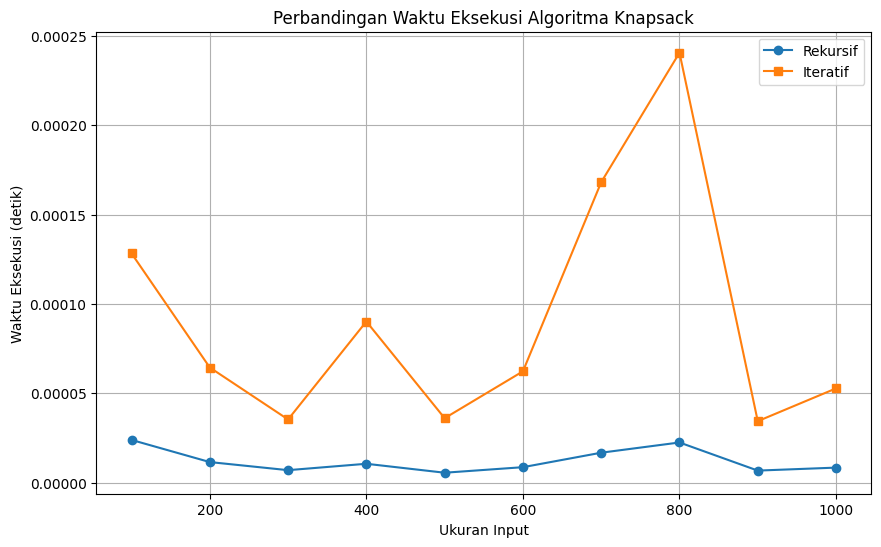


Analisis Waktu Eksekusi Algoritma Knapsack:
+--------------+--------------------+--------------------+
| Ukuran Input | Waktu Rekursif (d) | Waktu Iteratif (d) |
+--------------+--------------------+--------------------+
|     100      |      0.000024      |      0.000128      |
|     200      |      0.000011      |      0.000064      |
|     300      |      0.000007      |      0.000035      |
|     400      |      0.000010      |      0.000090      |
|     500      |      0.000005      |      0.000036      |
|     600      |      0.000009      |      0.000062      |
|     700      |      0.000017      |      0.000168      |
|     800      |      0.000022      |      0.000241      |
|     900      |      0.000007      |      0.000034      |
|     1000     |      0.000008      |      0.000053      |
+--------------+--------------------+--------------------+

Rata-rata Waktu Eksekusi:
Rekursif: 0.000012 detik
Iteratif: 0.000091 detik

Perbedaan (Iteratif - Rekursif): 0.000079 detik


In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable

class AlgoritmaKnapsack:
    def rekursif(self, bobot, nilai, kapasitas, n):
        if n == 0 or kapasitas == 0:
            return 0
        if bobot[n - 1] > kapasitas:
            return self.rekursif(bobot, nilai, kapasitas, n - 1)
        return max(
            nilai[n - 1] + self.rekursif(bobot, nilai, kapasitas - bobot[n - 1], n - 1),
            self.rekursif(bobot, nilai, kapasitas, n - 1)
        )

    def iteratif(self, bobot, nilai, kapasitas):
        n = len(nilai)
        dp = [[0 for _ in range(kapasitas + 1)] for _ in range(n + 1)]

        for i in range(1, n + 1):
            for w in range(1, kapasitas + 1):
                if bobot[i - 1] <= w:
                    dp[i][w] = max(nilai[i - 1] + dp[i - 1][w - bobot[i - 1]], dp[i - 1][w])
                else:
                    dp[i][w] = dp[i - 1][w]

        return dp[n][kapasitas]

class AnalisisKnapsack:
    def __init__(self):
        self.ukuran = []
        self.waktu_knapsack = {'iteratif': [], 'rekursif': []}
        self.algoritma = AlgoritmaKnapsack()

    def analisis_knapsack(self, data, ukuran_maks=1000, langkah=100):
        for ukuran in range(langkah, min(len(data), ukuran_maks) + 1, langkah):
            sampel_data = data.sample(n=ukuran)
            bobot = sampel_data[['W1', 'W2', 'W3', 'W4', 'W5']].iloc[0].dropna().astype(int).tolist()
            nilai = sampel_data[['P1', 'P2', 'P3', 'P4', 'P5']].iloc[0].dropna().astype(int).tolist()
            kapasitas = int(sampel_data['Capacity'].iloc[0])
            n = len(bobot)

            start_time = time.time()
            self.algoritma.rekursif(bobot, nilai, kapasitas, n)
            self.waktu_knapsack['rekursif'].append(time.time() - start_time)

            start_time = time.time()
            self.algoritma.iteratif(bobot, nilai, kapasitas)
            self.waktu_knapsack['iteratif'].append(time.time() - start_time)

            self.ukuran.append(ukuran)

    def plot_hasil(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.ukuran, self.waktu_knapsack['rekursif'], label='Rekursif', marker='o')
        plt.plot(self.ukuran, self.waktu_knapsack['iteratif'], label='Iteratif', marker='s')
        plt.xlabel('Ukuran Input')
        plt.ylabel('Waktu Eksekusi (detik)')
        plt.title('Perbandingan Waktu Eksekusi Algoritma Knapsack')
        plt.legend()
        plt.grid(True)
        plt.show()

    def cetak_statistik(self):
        tabel = PrettyTable()
        tabel.field_names = ["Ukuran Input", "Waktu Rekursif (d)", "Waktu Iteratif (d)"]

        for i in range(len(self.ukuran)):
            tabel.add_row([
                self.ukuran[i],
                f"{self.waktu_knapsack['rekursif'][i]:.6f}",
                f"{self.waktu_knapsack['iteratif'][i]:.6f}"
            ])

        print("\nAnalisis Waktu Eksekusi Algoritma Knapsack:")
        print(tabel)

        rata_rekursif = sum(self.waktu_knapsack['rekursif']) / len(self.waktu_knapsack['rekursif'])
        rata_iteratif = sum(self.waktu_knapsack['iteratif']) / len(self.waktu_knapsack['iteratif'])

        print(f"\nRata-rata Waktu Eksekusi:")
        print(f"Rekursif: {rata_rekursif:.6f} detik")
        print(f"Iteratif: {rata_iteratif:.6f} detik")
        print(f"\nPerbedaan (Iteratif - Rekursif): {rata_iteratif - rata_rekursif:.6f} detik")

data = pd.read_csv('/content/knapsack_5_items_new.csv')
analis = AnalisisKnapsack()
analis.analisis_knapsack(data, ukuran_maks=1000, langkah=100)
analis.plot_hasil()
analis.cetak_statistik()
